# Datasets 和 DataLoaders

处理数据样本的代码可能会变得混乱且难以维护；理想情况下，我们希望将数据集代码与模型训练代码分离，以提高可读性和模块化。PyTorch 提供了两个数据原语：`torch.utils.data.DataLoader` 和 `torch.utils.data.Dataset`，允许您使用预加载的数据集以及您自己的数据。Dataset 存储样本及其相应的标签，DataLoader 将可迭代对象包装在 Dataset 周围，以便轻松访问样本。

PyTorch 域库提供了许多预加载的数据集（例如 FashionMNIST），这些数据集是 `torch.utils.data.Dataset` 的子类，并实现特定于特定数据的函数。它们可用于为您的模型制作原型和基准测试。您可以在这里找到它们：[图像数据集](https://pytorch.org/vision/stable/datasets.html)、[文本数据集](https://pytorch.org/text/stable/datasets.html)和[音频数据集](https://pytorch.org/audio/stable/datasets.html)。

## 加载数据集

以下是如何从 TorchVision 加载 [Fashion-MNIST](https://research.zalando.com/project/fashion_mnist/fashion_mnist/) 数据集的示例。 Fashion-MNIST 是一个 Zalando 文章图像数据集，由 60,000 个训练示例和 10,000 个测试示例组成。 每个示例包括一张 28×28 灰度图像和 10 个类别中的一个相关标签。

我们使用以下参数加载 [FashionMNIST](https://pytorch.org/vision/stable/datasets.html#fashion-mnist) 数据集：
+ `root` 是存储训练/测试数据的路径，
+ `train` 指定训练或测试数据集，
+ `download=True` 如果 `root` 中没有数据，则从互联网下载数据。
+ `transform` 和 `target_transform` 指定特征和标签转换

In [2]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

traing_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

Matplotlib is building the font cache; this may take a moment.


100%|██████████| 26421880/26421880 [07:26<00:00, 59119.64it/s] 


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 190719.21it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:01<00:00, 3341908.71it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 21549178.63it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



## 遍历和可视化数据集

我们可以像列表一样手动索引数据集：`training_data[index]`。我们使用 `matplotlib` 来可视化训练数据中的某些样本。

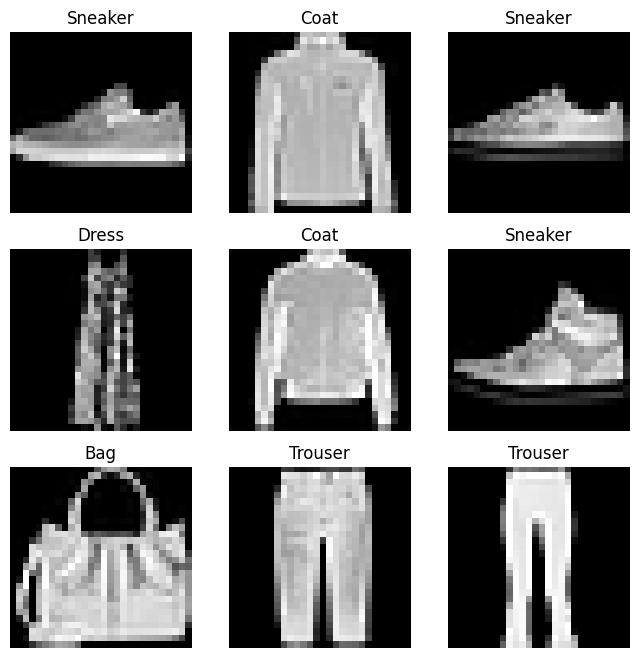

In [4]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}

figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(traing_data), size=(1,)).item()
    img, label = traing_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

## 根据自己的文件生成自定义数据集

自定义 Dataset 类必须实现三个函数：`__init__`、`__len__` 和 `__getitem__`。看一下这个实现；FashionMNIST 图像存储在目录 `img_dir` 中，其标签单独存储在 CSV 文件 `annotations_file` 中。

在接下来的部分中，我们将分解每个函数中发生的事情。